In [1]:
from mlp.nn import *
from mlp.viz import plot_history
from mlp.callbacks import EarlyStopping, ModelCheckpoint
from mlp.metrics import accuracy
from mlp.tools import train_test_split, load, save, binary_encoder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True)
model.add(Dense(1, activation=Sigmoid()))

In [9]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

[   10/10]: loss=0.31867 


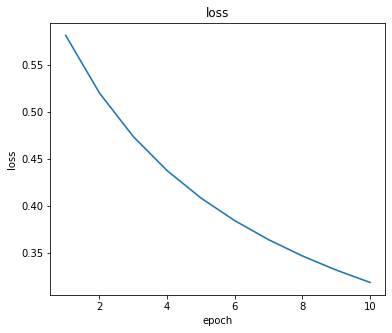

In [11]:
h = model.fit(X_normed, y_train, n_epochs=10)
plot_history(h)

In [12]:
accuracy(y_test, model.predict(X_test_normed) > .5)

0.9361702127659575

In [13]:
model = NeuralNetwork(loss=BinaryCrossEntropy(), optimizer='gd', verbose=True, verbose_step=25)
model.add(Dense(30, activation=Relu(), dropout_rate=.25))
model.add(Dense(1, activation=Sigmoid()))

In [14]:
es = EarlyStopping(monitor='val_loss')
checkpoint = ModelCheckpoint(filepath='nn.{epoch:05d}-{val_loss:.3f}.pcl', monitor='val_accuracy', verbose=False)
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10000, callbacks=[es, checkpoint], metrics=[accuracy], reinitialize=False)

[   25/10000]: loss=0.67084 val_loss=0.67585 accuracy=0.63947 val_accuracy=0.60638 
[   50/10000]: loss=0.64097 val_loss=0.65027 accuracy=0.63947 val_accuracy=0.60638 
[   75/10000]: loss=0.54363 val_loss=0.55815 accuracy=0.82368 val_accuracy=0.79787 
[  100/10000]: loss=0.36091 val_loss=0.38299 accuracy=0.95000 val_accuracy=0.92553 
[  125/10000]: loss=0.23491 val_loss=0.26252 accuracy=0.95789 val_accuracy=0.92553 
[  150/10000]: loss=0.17267 val_loss=0.20171 accuracy=0.95526 val_accuracy=0.93617 
[  175/10000]: loss=0.14011 val_loss=0.16870 accuracy=0.96316 val_accuracy=0.94681 
[  200/10000]: loss=0.12051 val_loss=0.14816 accuracy=0.96842 val_accuracy=0.95745 
[  225/10000]: loss=0.10744 val_loss=0.13416 accuracy=0.97368 val_accuracy=0.95745 
[  250/10000]: loss=0.09740 val_loss=0.12348 accuracy=0.97632 val_accuracy=0.95745 
[  275/10000]: loss=0.08952 val_loss=0.11523 accuracy=0.97632 val_accuracy=0.96277 
[  300/10000]: loss=0.08333 val_loss=0.10875 accuracy=0.97632 val_accuracy=0

In [15]:
accuracy(y_test, model.predict(X_test_normed))

0.9787234042553191

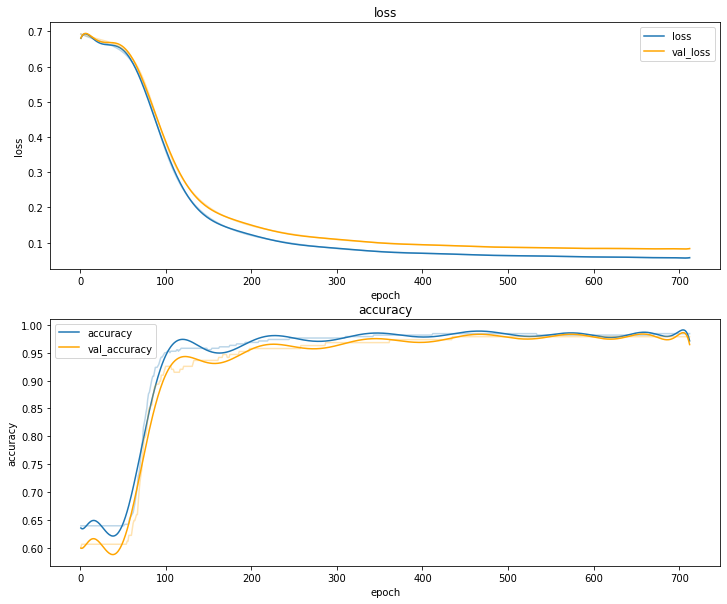

In [16]:
plot_history(h)

In [17]:
model.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 961
Total number of trainable params:	 961


In [18]:
from mlp.tools import load, save

save(model, 'neural_net.pcl')

In [19]:
nn = load('neural_net.pcl')

In [20]:
nn.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 961
Total number of trainable params:	 961


In [21]:
accuracy(y_test, nn.predict(X_test_normed))

0.9787234042553191

In [22]:
best_model = load(checkpoint.best_filepath)

In [23]:
accuracy(y_test, best_model.predict(X_test_normed))

0.9787234042553191